In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [22]:
def visualizar_imagenes(df, img_shape=(64, 64), n=5):
    """
    Visualiza las primeras n imágenes del DataFrame junto con sus etiquetas.

    Args:
        df (pd.DataFrame): DataFrame que contiene imágenes aplanadas y una columna de etiquetas.
        img_shape (tuple): Dimensiones originales de las imágenes (por defecto 64x64).
        n (int): Número de imágenes a visualizar.
    """
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    
    for i in range(n):
        # Obtener la fila correspondiente
        try:
            imagen_array = df.iloc[i, :-1].values.astype(float)  # Asegurar que son valores numéricos
        except ValueError as e:
            print(f"Error al procesar la fila {i}: {e}")
            continue
        
        etiqueta = df.iloc[i, -1]  # Asume que la última columna es 'etiqueta'
        
        # Reconstruir la imagen
        imagen = imagen_array.reshape(img_shape)
        
        # Mostrar la imagen
        ax = axes[i]
        ax.imshow(imagen, cmap='gray')  # Escala de grises
        ax.set_title(f"Etiqueta: {etiqueta}")
        ax.axis('off')  # Oculta los ejes
    
    plt.tight_layout()
    plt.show()


In [3]:
def cargar_imagenes_y_etiquetas(directorio):
    imagenes = []
    etiquetas = []

    # Recorre el directorio
    for archivo in os.listdir(directorio):
        if archivo.endswith(".jpg") or archivo.endswith(".png"):  # Asegúrate de incluir tus formatos de imagen
            etiqueta = archivo.split('.')[0]  # Usa el nombre del archivo como etiqueta
            ruta_imagen = os.path.join(directorio, archivo)

            # Abre la imagen, conviértela a escala de grises y redimensiónala (opcional)
            imagen = Image.open(ruta_imagen).convert('L')  # 'L' para escala de grises
            imagen = imagen.resize((64, 64))  # Redimensionar a 64x64 (puedes cambiar el tamaño)

            # Convierte la imagen a un array de numpy y aplánalo
            imagen_array = np.array(imagen).flatten()

            imagenes.append(imagen_array)
            etiquetas.append(etiqueta)

    # Crea un DataFrame con las imágenes y las etiquetas
    df = pd.DataFrame(imagenes)
    df['etiqueta'] = etiquetas
    return df

In [5]:
# Cargar imágenes y etiquetas en un DataFrame
df_imagenes_traing_cats = cargar_imagenes_y_etiquetas("training_set/training_set/cats")
df_imagenes_test_cats = cargar_imagenes_y_etiquetas("test_set/test_set/cats")
df_imagenes_training_dogs = cargar_imagenes_y_etiquetas("training_set/training_set/dogs")
df_imagenes_test_dogs = cargar_imagenes_y_etiquetas("test_set/test_set/dogs")

In [61]:
df_imagenes_training_dogs.shape

(4005, 4097)

In [62]:
df_imagenes_test_cats.shape

(1011, 4097)

In [7]:
df_imagenes_test_dogs

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,etiqueta
0,62,41,85,88,106,77,9,15,14,12,...,140,144,142,143,144,141,143,144,144,dog
1,24,23,23,23,23,24,24,24,24,24,...,29,27,27,27,28,28,28,27,27,dog
2,7,7,7,7,7,7,7,7,7,7,...,89,69,78,70,27,20,20,18,17,dog
3,43,34,97,138,138,135,104,103,118,131,...,109,108,109,107,107,104,105,102,99,dog
4,108,108,108,108,108,108,108,108,108,108,...,143,136,138,138,141,140,137,130,128,dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,74,72,74,73,73,77,97,76,90,98,...,105,106,100,103,82,114,135,156,154,dog
1008,131,135,136,135,132,133,135,142,142,147,...,74,70,68,72,77,100,76,54,71,dog
1009,103,104,106,105,106,107,107,107,109,109,...,121,121,121,119,119,119,119,119,118,dog
1010,170,115,79,116,112,118,136,164,178,172,...,128,133,130,156,162,162,169,175,157,dog


In [8]:
df_imagenes=pd.concat([df_imagenes_traing_cats,df_imagenes_training_dogs],axis=0,ignore_index=True)

In [9]:
df_imagenes=pd.concat([df_imagenes,df_imagenes_test_cats],axis=0,ignore_index=True)

In [10]:
df_imagenes=pd.concat([df_imagenes,df_imagenes_test_dogs],axis=0,ignore_index=True)

In [11]:
df_imagenes.etiqueta.value_counts()

etiqueta
dog    5017
cat    5011
Name: count, dtype: int64

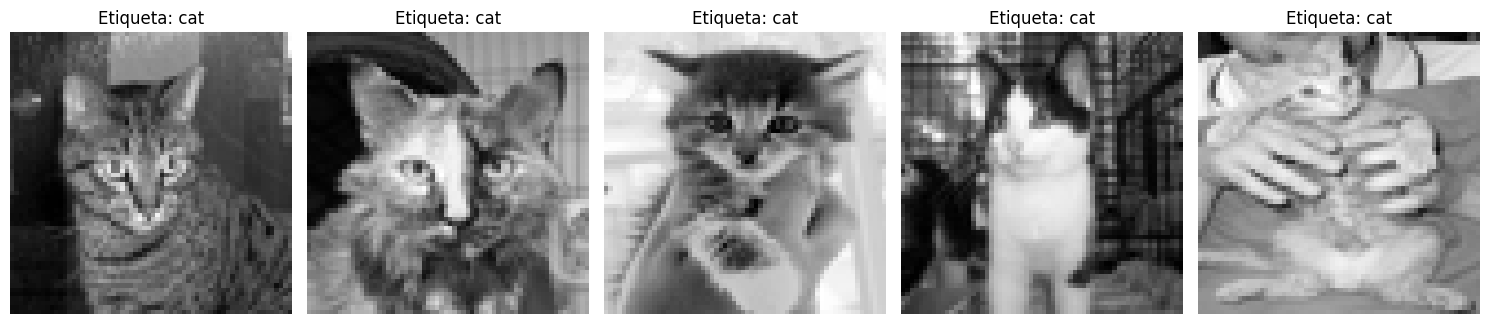

In [23]:
# Uso de la función:
# Suponiendo que df_imagenes es el DataFrame devuelto por la función cargar_imagenes_y_etiquetas
visualizar_imagenes(df_imagenes, img_shape=(64, 64), n=5)

In [9]:
# Separar las características (imágenes) y las etiquetas
X = df_imagenes.drop('etiqueta', axis=1)
y = df_imagenes['etiqueta']

In [10]:
y.value_counts()

etiqueta
dog    5017
cat    5011
Name: count, dtype: int64

In [11]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Crear el clasificador KNeighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
# Entrenar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# Hacer predicciones
y_pred = knn.predict(X_test)

In [15]:
# Calcular la precisión
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision * 100:.2f}%")

Precisión del modelo: 53.39%


In [84]:
for v in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=v)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = accuracy_score(y_test, y_pred)
    print(f"Precisión del modelo con {v}: {precision * 100:.2f}%")


Precisión del modelo con 1: 54.44%
Precisión del modelo con 2: 52.09%
Precisión del modelo con 3: 53.39%
Precisión del modelo con 4: 53.44%
Precisión del modelo con 5: 55.43%
Precisión del modelo con 6: 53.79%
Precisión del modelo con 7: 55.88%
Precisión del modelo con 8: 55.63%
Precisión del modelo con 9: 57.18%
Precisión del modelo con 10: 56.33%
Precisión del modelo con 11: 57.48%
Precisión del modelo con 12: 56.83%
Precisión del modelo con 13: 56.53%
Precisión del modelo con 14: 56.18%
Precisión del modelo con 15: 56.93%
Precisión del modelo con 16: 56.48%
Precisión del modelo con 17: 57.43%
Precisión del modelo con 18: 56.68%
Precisión del modelo con 19: 57.83%
Precisión del modelo con 20: 57.03%


In [85]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_pred=y_pred,y_true=y_test)
confusion

array([[710, 312],
       [550, 434]], dtype=int64)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [17]:
estimadores=[KNeighborsClassifier,SVC,GaussianNB]

In [ ]:
for estimador in estimadores:
    estimador=estimador()
    kfold=KFold(n_splits=10,random_state=11,shuffle=True)
    puntuacion=cross_val_score(estimator=estimador,X=X,y=y,cv=kfold)
    print(f'{estimador.__class__.__name__:>20} '+f'Puntuacion promedio: {puntuacion.mean():.2%}; '+ f'Desviacion estadar: {puntuacion.std():.2%}')

KNeighborsClassifier Puntuacion promedio: 56.30%; Desviacion estadar: 1.34%
